# Análisis Descriptivo

a continuación se presenta una descripción y visualización de los datos

In [2]:
#IMPORTS

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#DATABASE CONNECTION

#file_path = r"linkedindatabase.db"
file_path = r"C:\Users\Sarah\Code\ProyectoABD\database\linkedindatabase.db"
conn = sqlite3.connect(file_path)

In [21]:
df = pd.read_sql('SELECT * FROM clean_numerical_postings', conn)

df = df[df['max_salary'] <= 10000000]
df = df[df['min_salary'] <= 10000000]
df = df[df['normalized_salary'] <= 10000000]

df = df[df['max_salary'] > 100]
df = df[df['min_salary'] > 100]
df = df[df['normalized_salary'] > 100]



## Análisis Estadístico Básico

se realiza un análisis estadístico básico para los siguientes atributos de cada publicación de trabajo:

* Rango Salarial ofrecido para el puesto
* Número de vistas
* Número de aplicaciones recibidas
* Duración de la publicación

se visualizan algunas medidas de centralización y de dispersión

### Rango salarial

In [22]:
nor_salary_insights = df[df['normalized_salary'].notnull()]
nor_salary_insights = nor_salary_insights.sort_values(by='normalized_salary', ascending=False)
nor_salary_insights = nor_salary_insights[nor_salary_insights['normalized_salary'] != 0]
nor_salary_insights.rename(columns={'normalized_salary': 'salary'}, inplace=True)
nor_salary_insights['category'] = 'normalized_salary'

max_salary_insights = df[df['max_salary'].notnull()]
max_salary_insights = max_salary_insights.sort_values(by='max_salary', ascending=False)
max_salary_insights = max_salary_insights[max_salary_insights['max_salary'] != 0]
max_salary_insights.rename(columns={'max_salary': 'salary'}, inplace=True)
max_salary_insights['category'] = 'max_salary'

min_salary_insights = df[df['min_salary'].notnull()]
min_salary_insights = min_salary_insights.sort_values(by='min_salary', ascending=False)
min_salary_insights = min_salary_insights[min_salary_insights['min_salary'] != 0]
min_salary_insights.rename(columns={'min_salary': 'salary'}, inplace=True)
min_salary_insights['category'] = 'min_salary'

salary_combined = pd.concat([nor_salary_insights, max_salary_insights, min_salary_insights], ignore_index=True)


In [23]:
print(max_salary_insights['salary'].max())
print(nor_salary_insights['salary'].max())
print(min_salary_insights['salary'].max())

print(max_salary_insights['salary'].min())
print(nor_salary_insights['salary'].min())
print(min_salary_insights['salary'].min())

9274855.200000001
950000.0
8996586.56
115.0
110.0
105.0


C:\Users\Sarah\AppData\Local\Temp\ipykernel_13888\1073415731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='salary', y='category', data=salary_combined, jitter=True, size=8, palette={'normalized_salary': 'red', 'max_salary': 'blue', 'min_salary': 'green'})


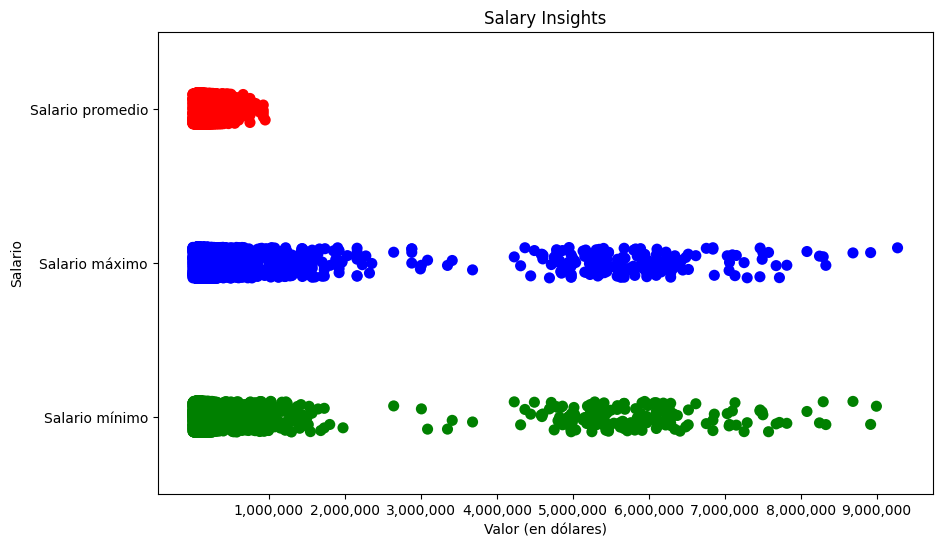

In [24]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='salary', y='category', data=salary_combined, jitter=True, size=8, palette={'normalized_salary': 'red', 'max_salary': 'blue', 'min_salary': 'green'})

plt.xticks(ticks=np.arange(1000000, 10000000, 1000000), labels=[f'{i:,.0f}' for i in np.arange(1000000, 10000000, 1000000)])
plt.yticks(ticks=[0, 1, 2], labels=['Salario promedio', 'Salario máximo', 'Salario mínimo'])
plt.xlabel('Valor (en dólares)')
plt.ylabel('Salario')
plt.title('Salary Insights')

plt.show()

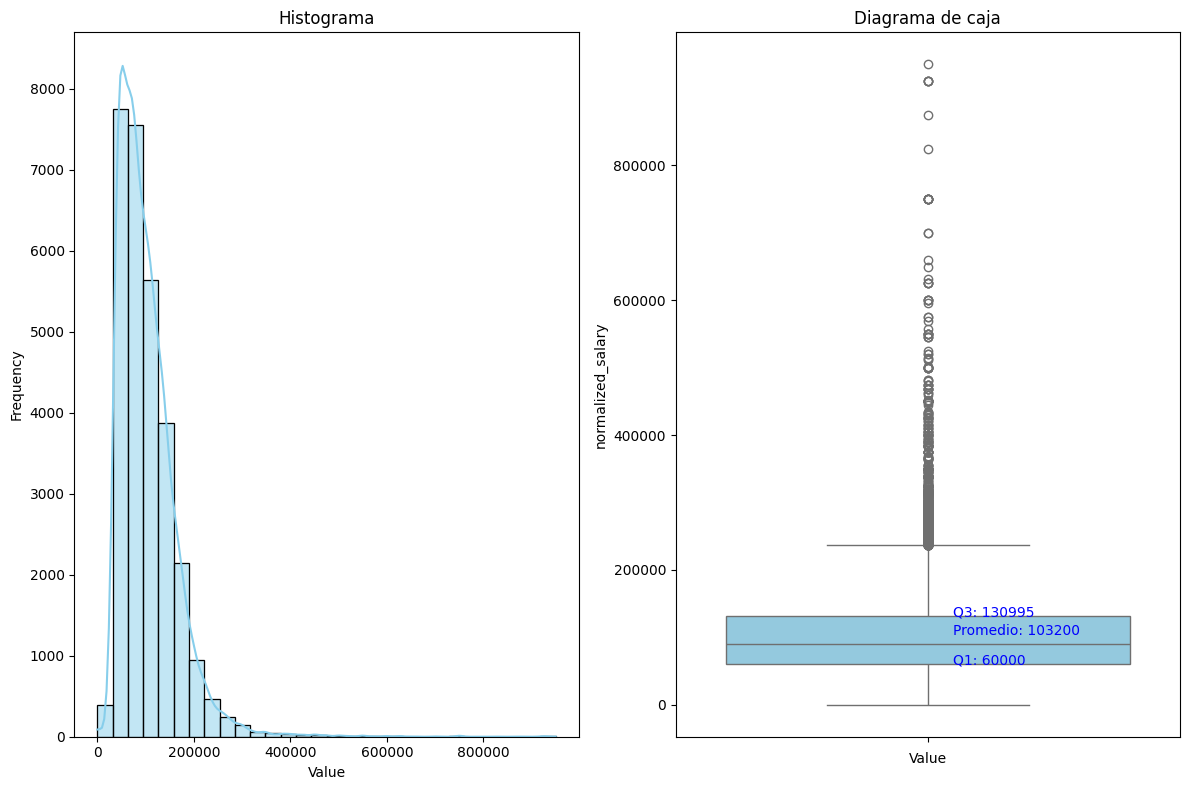

In [39]:
salary = df['normalized_salary'].dropna()
# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.histplot(salary, kde=True, color='skyblue', bins=30)
plt.title('Histograma')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Calculate mean and quartiles
mean_value = np.mean(salary)
q1 = np.percentile(salary, 25)
q3 = np.percentile(salary, 75)

# Plotting the boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=salary, color='skyblue', orient='v')
plt.title('Diagrama de caja')
plt.xlabel('Value')

# Annotate the mean and quartile values on the boxplot
plt.text(0.05, mean_value, f'Promedio: {mean_value:.0f}', color='blue', fontsize=10)
plt.text(0.05, q1, f'Q1: {q1:.0f}', color='blue', fontsize=10)
plt.text(0.05, q3, f'Q3: {q3:.0f}', color='blue', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

### Visitas

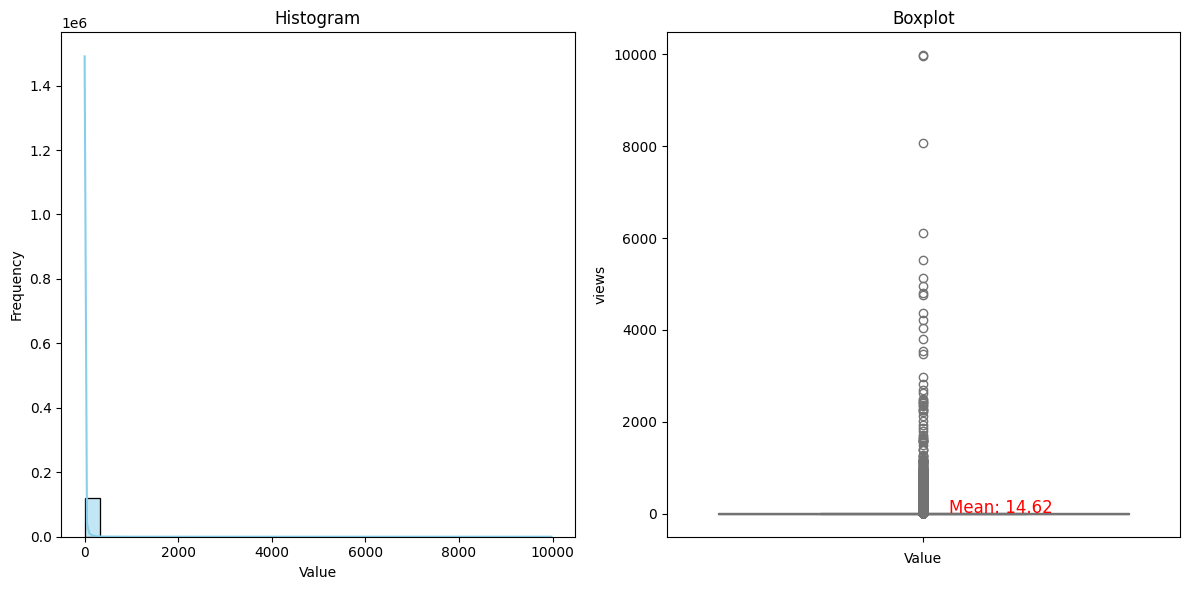

In [ ]:
views = df['views'].dropna()
# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.histplot(views, kde=True, color='skyblue', bins=30)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Calculate mean and quartiles
mean_value = np.mean(views)
q1 = np.percentile(views, 25)
q3 = np.percentile(views, 75)

# Plotting the boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=views, color='lightgreen')
plt.title('Boxplot')
plt.xlabel('Value')

# Annotate the mean and quartile values on the boxplot
plt.text(0.05, mean_value, f'Mean: {mean_value:.2f}', color='red', fontsize=12)
plt.text(0.05, q1, f'Q1: {q1:.2f}', color='blue', fontsize=12)
plt.text(0.05, q3, f'Q3: {q3:.2f}', color='blue', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


### Aplicaciones por puesto

### Duración de la publicación

In [ ]:
conn.close()